## IRIS DATASET CLASSIFICATION USING SVM

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [ ]:
iris = pd.read_csv("Iris.csv") #load the dataset

In [ ]:
iris.head(2) #show the first 2 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.drop('Id',axis=1,inplace=True)

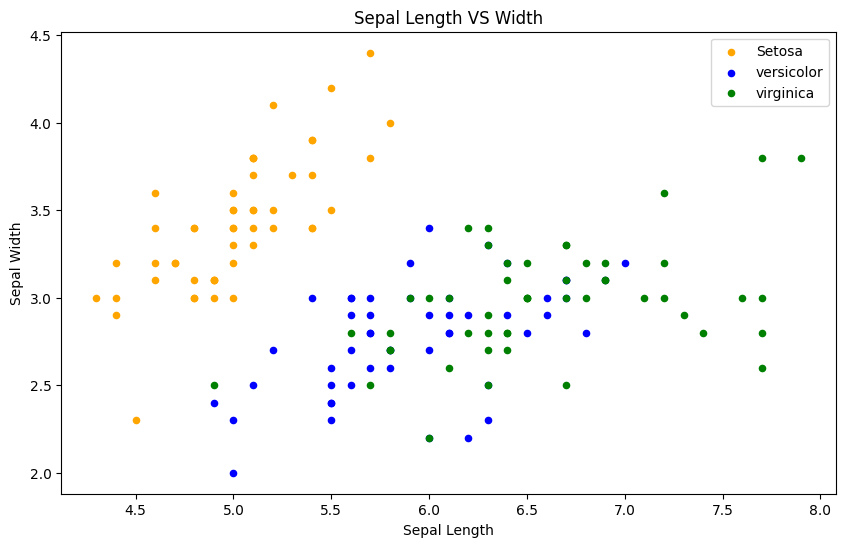

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

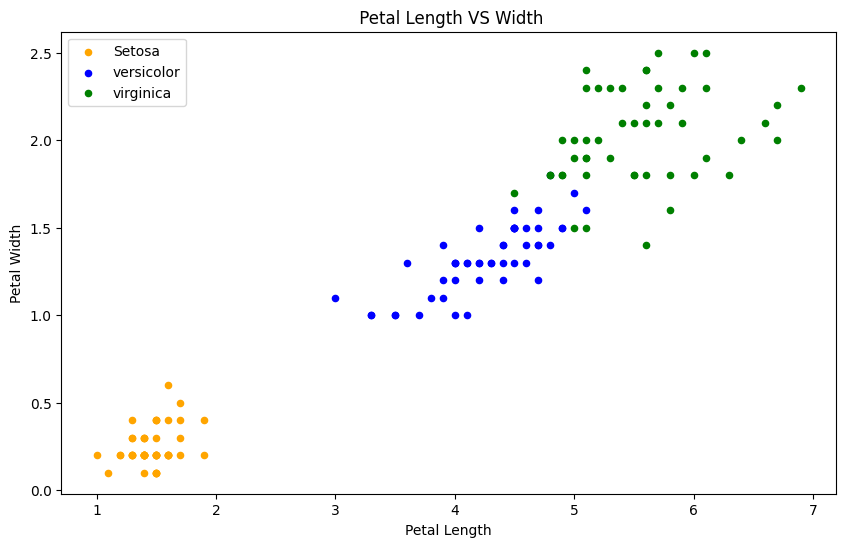

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

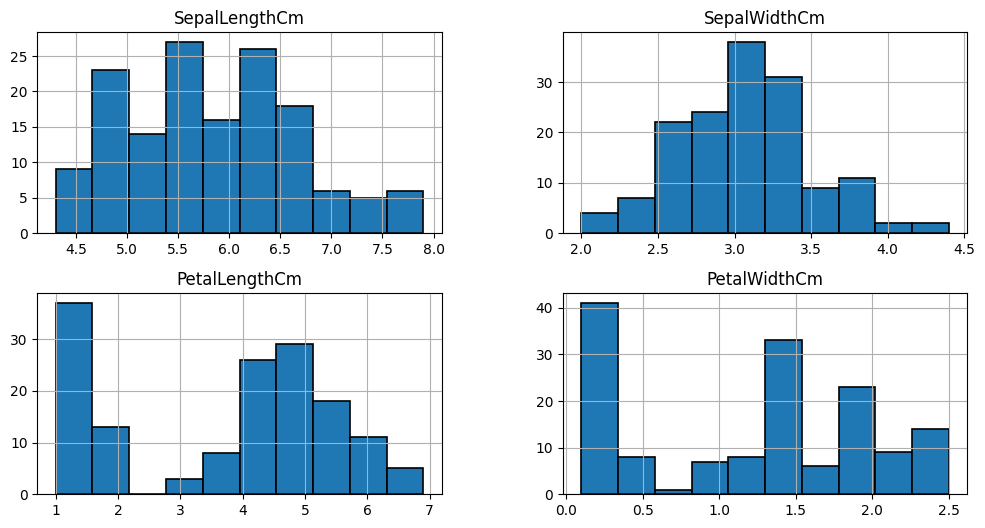

In [ ]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

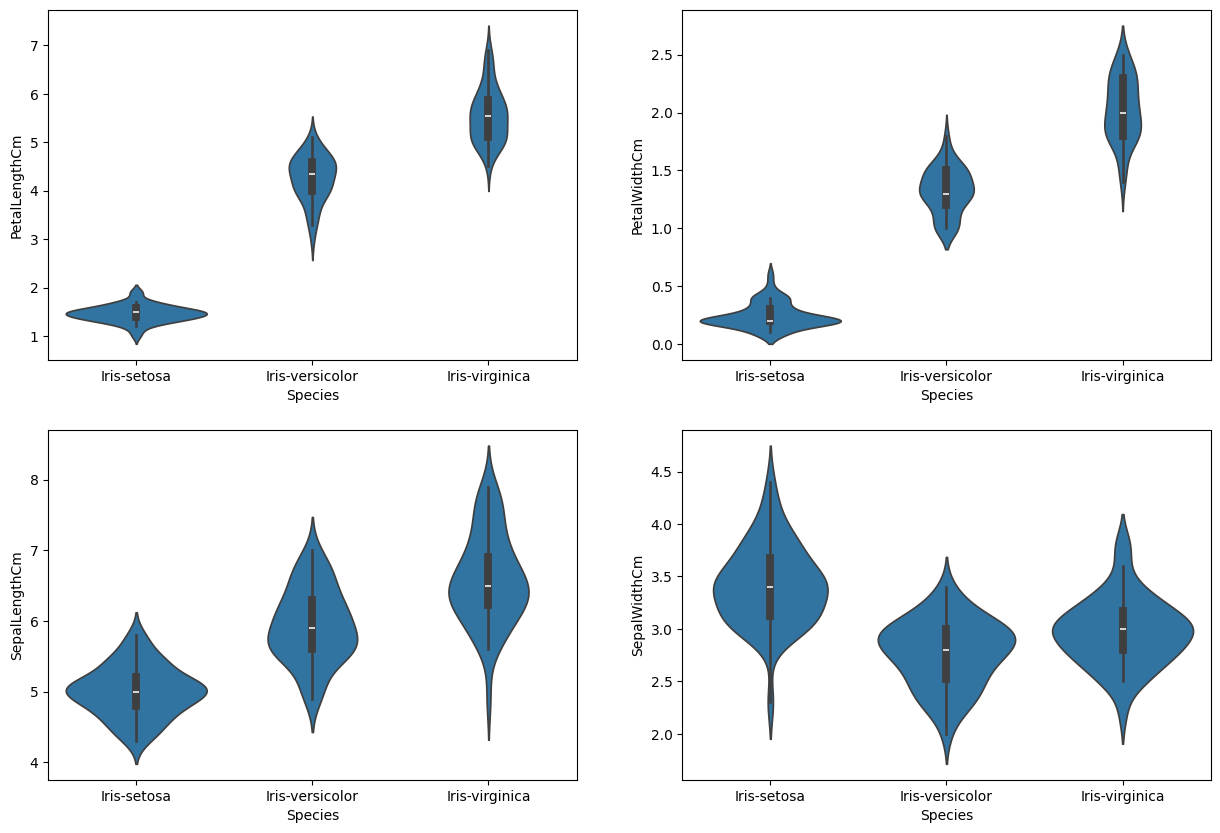

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [ ]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [ ]:
iris.shape #get the shape of the dataset

(150, 5)

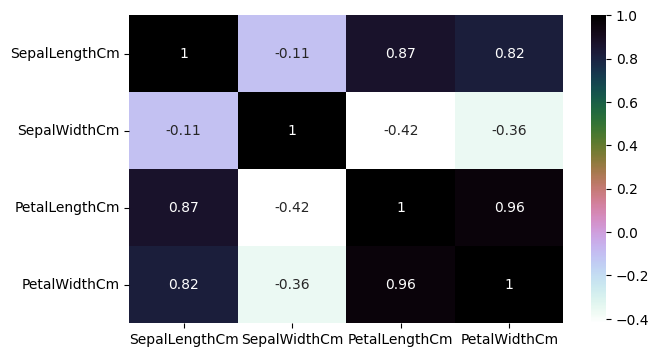

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.drop('Species', axis=1).corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [ ]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [ ]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [ ]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
20,5.4,3.4,1.7,0.2
140,6.7,3.1,5.6,2.4


In [ ]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
136,6.3,3.4,5.6,2.4
146,6.3,2.5,5.0,1.9


In [ ]:
train_y.head()  ##output of the training data

,Species
20,Iris-setosa
140,Iris-virginica
97,Iris-versicolor
74,Iris-versicolor
121,Iris-virginica


###SVM

In [ ]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm.
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9333333333333333


In [ ]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [ ]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [ ]:
model=svm.SVC()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [ ]:
print(test_X.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
136            6.3           3.4            5.6           2.4
146            6.3           2.5            5.0           1.9
83             6.0           2.7            5.1           1.6
18             5.7           3.8            1.7           0.3
147            6.5           3.0            5.2           2.0


In [ ]:
sample_input = test_X.iloc[[0]][['SepalWidthCm', 'SepalLengthCm']] # Get the first sample from test_X with only Sepal features
print("Sample Input for Prediction:")
display(sample_input)
sample_prediction = model.predict(sample_input)
print(f"\nPredicted Species: {sample_prediction[0]}")

Sample Input for Prediction:


,SepalWidthCm,SepalLengthCm
136,3.4,6.3



Predicted Species: Iris-virginica


## IMPROVED IRIS CLASSIFICATION USING SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = improved_iris.drop('species', axis=1)
y = improved_iris['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("\n--- SVM Model Performance on Improved Dataset ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show sample predictions
print("\n--- Sample Predictions ---")
sample_indices = [0, 10, 20]
for i in sample_indices:
    sample_input = X_test_scaled[i].reshape(1, -1)
    sample_prediction = svm_model.predict(sample_input)
    print(f"Sample features: {X_test.iloc[i].values}, Actual: {y_test.iloc[i]}, Predicted: {sample_prediction[0]}")


--- SVM Model Performance on Improved Dataset ---
Accuracy: 1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


--- Sample Predictions ---
Sample features: [6.1        2.8        4.7        1.2        3.91666667 2.17857143], Actual: 1, Predicted: 1
Sample features: [6.5     3.2     5.1     2.      2.55    2.03125], Actual: 2, Predicted: 2
Sample features: [4.7     3.2     1.6     0.2     8.      1.46875], Actual: 0, Predicted: 0


In [ ]:
import numpy as np

# Get 5 random indices from the test set
num_samples = 5
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

print(f"\n--- {num_samples} Random Sample Predictions ---")
for i in random_indices:
    sample_features_original = X_test.iloc[i].values
    sample_input_scaled = X_test_scaled[i].reshape(1, -1)
    sample_actual = y_test.iloc[i]
    sample_prediction = svm_model.predict(sample_input_scaled)

    print(f"Sample features: {sample_features_original}, Actual: {sample_actual}, Predicted: {sample_prediction[0]}")


--- 5 Random Sample Predictions ---
Sample features: [6.1        2.8        4.7        1.2        3.91666667 2.17857143], Actual: 1, Predicted: 1
Sample features: [4.8       3.1       1.6       0.2       8.        1.5483871], Actual: 0, Predicted: 0
Sample features: [7.7        2.6        6.9        2.3        3.         2.96153846], Actual: 2, Predicted: 2
Sample features: [4.4   3.2   1.3   0.2   6.5   1.375], Actual: 0, Predicted: 0
Sample features: [6.2        2.2        4.5        1.5        3.         2.81818182], Actual: 1, Predicted: 1


In [ ]:
improved_iris = pd.read_excel("Improved_Iris_Dataset.xlsx") #load the dataset

In [ ]:
print("First 5 rows of the improved Iris dataset:")
display(improved_iris.head())
print("\nInformation about the improved Iris dataset:")
improved_iris.info()

First 5 rows of the improved Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,petal_ratio,sepal_ratio
0,5.1,3.5,1.4,0.2,0,7.0,1.457143
1,4.9,3.0,1.4,0.2,0,7.0,1.633333
2,4.7,3.2,1.3,0.2,0,6.5,1.468750
3,4.6,3.1,1.5,0.2,0,7.5,1.483871
4,5.0,3.6,1.4,0.2,0,7.0,1.388889



Information about the improved Iris dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   petal_ratio        150 non-null    float64
 6   sepal_ratio        150 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.3 KB
